# Credit Card Lead Prediction

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [76]:
# Import dataset
df_train = pd.read_csv('train_s3TEQDk.csv')
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [6]:
# Shape of the data
df_train.shape

# There is 2.45L rows and 11 columns are there.

(245725, 11)

In [7]:
# Datatypes of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


* Except Age, Vintage and Avg_Account_Balance all other variables are categorical in nature.
* Also presence of missing values are seen in Credit_Product variable.
* Is_Lead is the target variable.

In [21]:
# Five point summary for numerical variables
df_train.describe(exclude='object')

# Minimum age of the customer is found to be 23yrs and maximum age is 85yrs

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [22]:
# Five point summary for categorical variables
df_train.describe(include='object')

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
count,245725,245725,245725,245725,245725,216400,245725
unique,245725,2,35,4,4,2,2
top,PRNFLAUG,Male,RG268,Self_Employed,X1,No,No
freq,1,134197,35934,100886,103718,144357,150290


# Univariant analysis

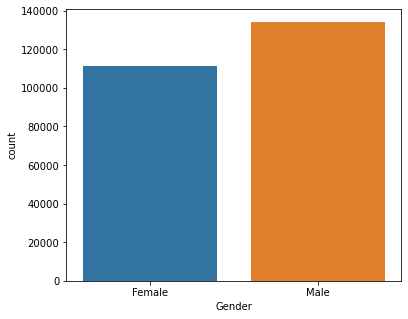

In [15]:
# Count plot for gender variable
plt.figure(figsize=(6,5))
sns.countplot(df_train['Gender'])
plt.show()

# dataset consist of more male gender observations than female.

In [23]:
# Unique region code names
df_train['Region_Code'].unique()

array(['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283',
       'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284',
       'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256',
       'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264',
       'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271'],
      dtype=object)

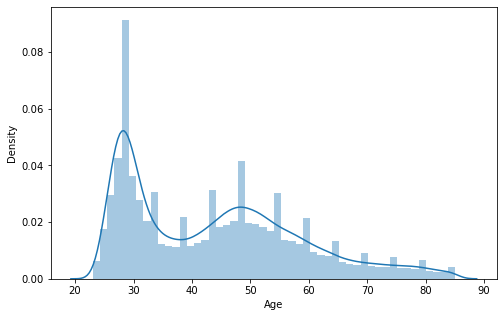

In [25]:
# distribution of age
plt.figure(figsize=(8,5))
sns.distplot(df_train['Age'])
plt.show()

# Age variable is right skewed.
# between 26-28yrs and 46-49yrs most of the customers are seen

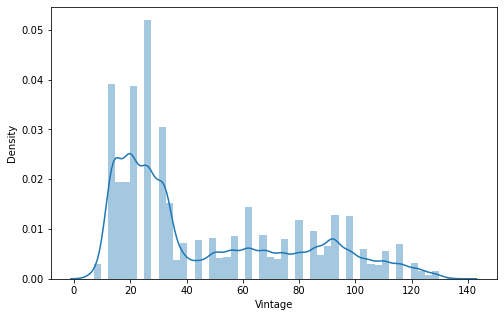

In [29]:
# distribution of Vintage
plt.figure(figsize=(8,5))
sns.distplot(df_train['Vintage'])
plt.show()

# Vintage variable is right skewed.

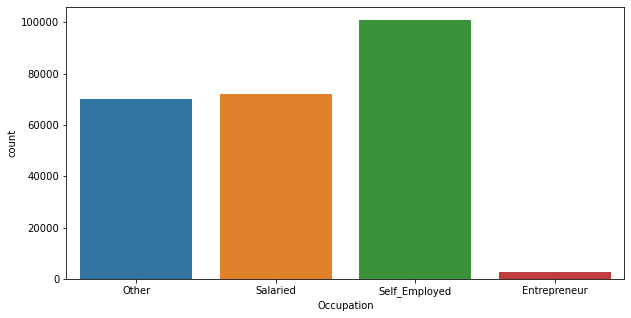

In [27]:
# Occupation of customers
plt.figure(figsize=(10,5))
sns.countplot(df_train['Occupation'])
plt.show()

# Most of the customers are self employed and very least is Entrepreneur

In [31]:
# Unique channel code
df['Channel_Code'].unique()

# There are 4 differnt channel code present in the dataset

array(['X3', 'X1', 'X2', 'X4'], dtype=object)

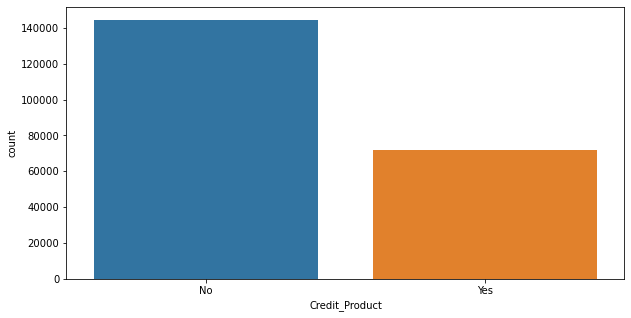

In [34]:
# credit product of customers
plt.figure(figsize=(10,5))
sns.countplot(df_train['Credit_Product'])
plt.show()

# Most of the customers do not have credit card products

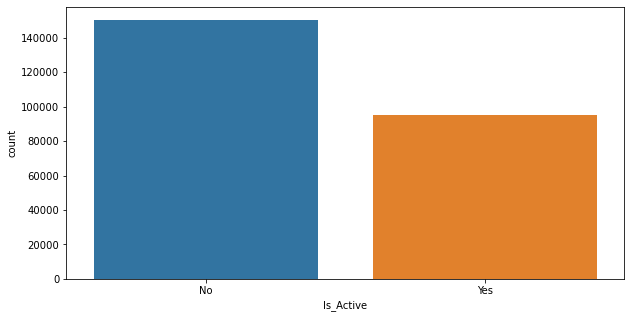

In [35]:
# customers status
plt.figure(figsize=(10,5))
sns.countplot(df_train['Is_Active'])
plt.show()

# Most of the customers are not active in last 3months

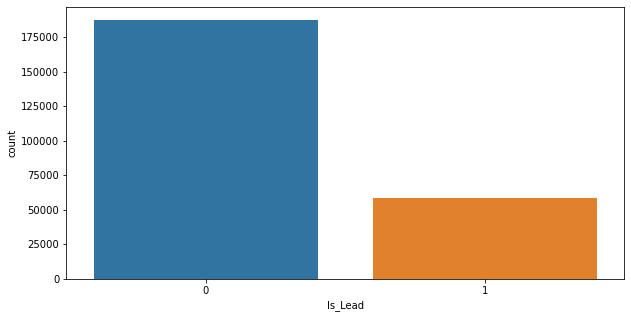

In [36]:
# customers interest in purchase of credit card product
plt.figure(figsize=(10,5))
sns.countplot(df_train['Is_Lead'])
plt.show()

# Very few customers are showing interest in buying credit card product

# Bivariant and multivariant analysis

<Figure size 1080x360 with 0 Axes>

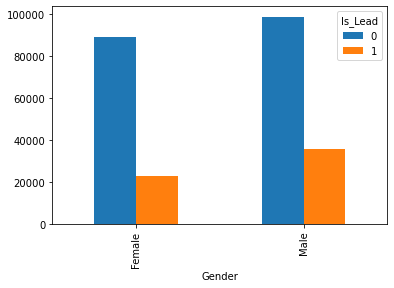

In [68]:
# Gender with target
plt.figure(figsize=(15,5))
pd.crosstab(df_train['Gender'], df_train['Is_Lead']).plot(kind='bar')
plt.show()

# Males are more interested towards buying credit card than females

In [69]:
df_train.groupby(by=['Is_Lead']).mean()

# customers with average age of 50yrs interested in buying more credit products
# Customers with more account balance are interested in buying product.

,Age,Vintage,Avg_Account_Balance
Is_Lead,,,
0,41.947662,41.913923,1.103018e+06
1,49.993944,63.183074,1.210034e+06


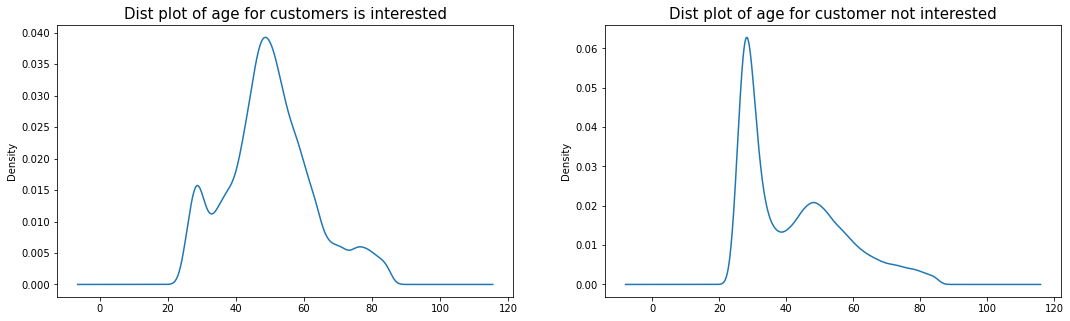

In [80]:
# Age v/s target
fig,axes  = plt.subplots(1,2,figsize = (18,5))

ax1 = plt.subplot(1, 2, 1)
df_train[df_train['Is_Lead'] ==1]['Age'].plot(kind='kde', ax=ax1)
plt.title('Dist plot of age for customers is interested', fontsize=15)

ax2 = plt.subplot(1, 2, 2)
df_train[df_train['Is_Lead'] ==0]['Age'].plot(kind='kde', ax=ax2)
plt.title('Dist plot of age for customer not interested', fontsize=15)
plt.show()

# Customers interested in buying credit product is almost normally distributed.
# Customers not interested in buying credit product is alomost right skewed.

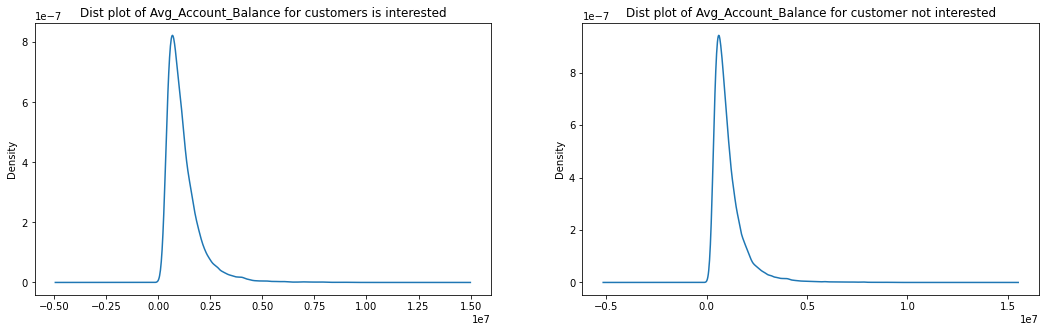

In [84]:
# Avg_Account_Balance v/s target
fig,axes  = plt.subplots(1,2,figsize = (18,5))

ax1 = plt.subplot(1, 2, 1)
df_train[df_train['Is_Lead'] ==1]['Avg_Account_Balance'].plot(kind='kde', ax=ax1)
plt.title('Dist plot of Avg_Account_Balance for customers is interested', fontsize=12)

ax2 = plt.subplot(1, 2, 2)
df_train[df_train['Is_Lead'] ==0]['Avg_Account_Balance'].plot(kind='kde', ax=ax2)
plt.title('Dist plot of Avg_Account_Balance for customer not interested', fontsize=12)
plt.show()


# Both plots are showing right skewed distribution.
# hence Avg_Account_Balance not helping in predicting target

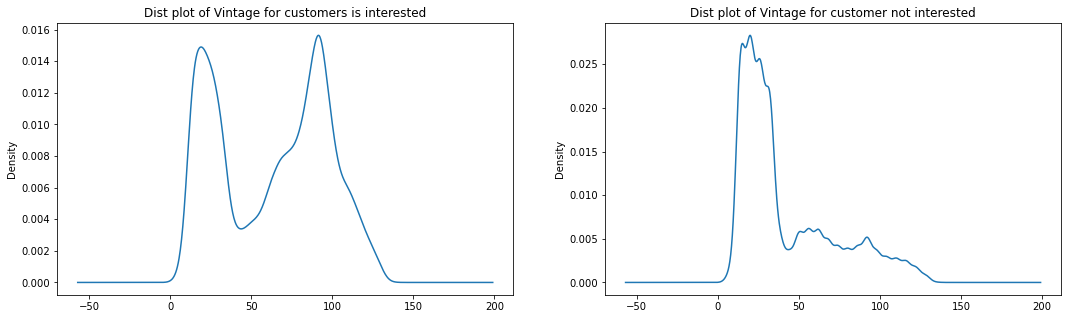

In [85]:
# Vintage v/s target
fig,axes  = plt.subplots(1,2,figsize = (18,5))

ax1 = plt.subplot(1, 2, 1)
df_train[df_train['Is_Lead'] ==1]['Vintage'].plot(kind='kde', ax=ax1)
plt.title('Dist plot of Vintage for customers is interested', fontsize=12)

ax2 = plt.subplot(1, 2, 2)
df_train[df_train['Is_Lead'] ==0]['Vintage'].plot(kind='kde', ax=ax2)
plt.title('Dist plot of Vintage for customer not interested', fontsize=12)
plt.show()


<Figure size 1800x432 with 0 Axes>

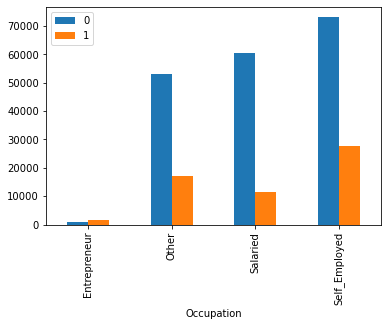

In [90]:
# Occupation with target
plt.figure(figsize=(25,6))
pd.crosstab(df_train['Occupation'], df_train['Is_Lead']).plot(kind='bar')
plt.legend()
plt.show()

# Entrepreneur are using more credit products among entrepreneur group.
# In other occupations, most of the customers are not interested in buying credit products.

<Figure size 1800x432 with 0 Axes>

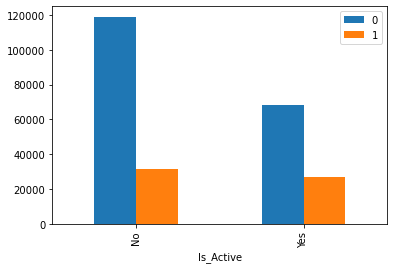

In [91]:
# Is_Active with target
plt.figure(figsize=(25,6))
pd.crosstab(df_train['Is_Active'], df_train['Is_Lead']).plot(kind='bar')
plt.legend()
plt.show()

# In both active and not active customers, most of them are not interested in buying credit products

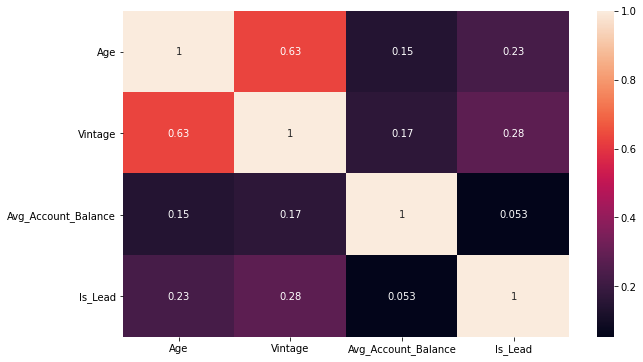

In [95]:
# Heat map for correlation
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

# Both vintage and age variable are positive correlation with r=0.63

In [32]:
# Null values treatement
df_train.isnull().sum() / df_train.shape[0] * 100

# Credit_Product variable have almost 12% null valuesdf

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [34]:
df_train['Credit_Product'].fillna(method='ffill', inplace=True)
df_train.isnull().sum().sum()

0

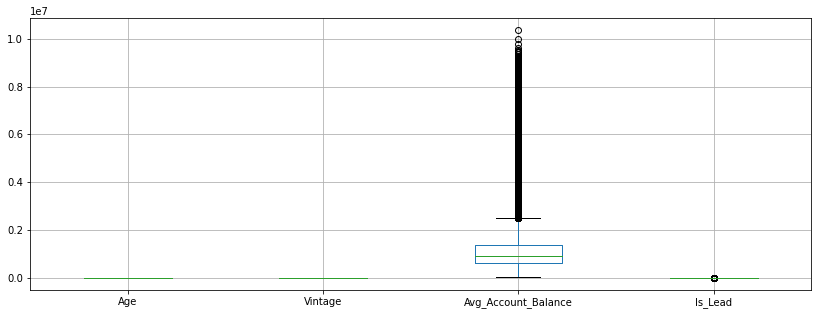

In [35]:
# Outliers in the dataset
plt.figure(figsize=(14,5))
df_train.boxplot()
plt.show()

In [28]:
# Outlier detection using IQR method and treatment
q1 = df_train['Avg_Account_Balance'].quantile(0.25)
q3 = df_train['Avg_Account_Balance'].quantile(0.75)
IQR = q3 - q1

upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

# Presence of outliers
df_train[(df_train['Avg_Account_Balance'] > upper_limit) | (df_train['Avg_Account_Balance'] < lower_limit)]

# There is almost 6% of outliers are present in the dataset.
# To avoid data loss, we are not removing it and transforming it using log transformation.

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
35,PML5FCBV,Female,29,RG284,Salaried,X1,26,No,2521592,No,0
71,HXSR7NXQ,Male,27,RG254,Salaried,X1,13,No,2824468,No,0
113,JAS9QVTW,Female,27,RG268,Salaried,X1,21,No,6278683,Yes,0
184,HW8HSYK3,Female,74,RG268,Other,X3,33,No,5878049,Yes,0
205,6OB4KY6J,Male,33,RG268,Other,X1,25,No,2952343,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245638,GEPQVQKB,Male,48,RG283,Self_Employed,X2,31,No,5396737,No,0
245653,UKT5GX45,Male,46,RG257,Self_Employed,X1,26,Yes,6900312,No,1
245661,ASYCDDTY,Female,30,RG276,Salaried,X1,15,No,3566719,Yes,0
245676,2AYXS3T3,Male,35,RG253,Self_Employed,X2,61,No,2769973,Yes,0


In [77]:
# Transformation using log method
df_train['Avg_Account_Balance'] = np.log(df_train['Avg_Account_Balance'])

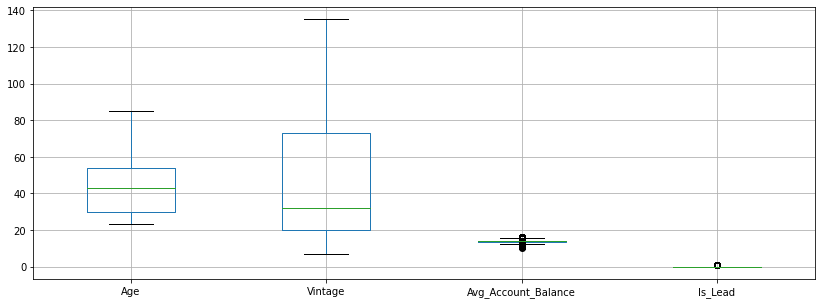

In [78]:
# Outliers in the dataset
plt.figure(figsize=(14,5))
df_train.boxplot()
plt.show()

In [79]:
# Drop insignificant variables like ID and Region code which will not help in improving model performance
df_train.drop(columns=['ID', 'Region_Code'], inplace=True)

In [80]:
# Convert all categorical columns into numerical
df_train = pd.get_dummies(df_train.drop('Is_Active', axis=1), drop_first=True)

Converting train set as modified train after EDA

df_train.to_csv('df_train.csv')

# EDA for test set

In [83]:
# Read the test data
df_test = pd.read_csv('test_mSzZ8RL.csv')
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [84]:
# Performing all the operation did for train set
# Null value imputation
df_test['Credit_Product'].fillna(method='ffill', inplace=True)
df_test.isnull().sum().sum()

0

In [85]:
# Transforming Avg_Account_Balance using log transformation
df_test['Avg_Account_Balance'] = np.log(df_test['Avg_Account_Balance'])

In [86]:
# Drop insignificant variables like ID and Region code which will not help in improving model performance
df_test.drop(columns=['ID', 'Region_Code'], inplace=True)

In [87]:
# Convert all categorical columns into numerical
df_test = pd.get_dummies(df_test.drop('Is_Active', axis=1), drop_first=True)

Converting train set as modified train after EDA

df_test.to_csv('df_test.csv')

# Model building

In [119]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import lightgbm as lgb
import xgboost as xgb
from scipy.stats import randint as sp_randint


In [93]:
# Lets consider train set for splitting data into train and test as 70:30 ratio
x = df_train.drop('Is_Lead', axis=1)
y = df_train['Is_Lead']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Logisic regresion

In [108]:
loc = LogisticRegression(solver='liblinear')
loc.fit(x_train, y_train)

y_train_pred = loc.predict(x_train)
y_train_prob = loc.predict_proba(x_train)[:, 1]

print('ROC score for train is :', roc_auc_score(y_train, y_train_prob))
print('Classification report for train:\n')
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

y_test_pred = loc.predict(x_test)
y_test_prob = loc.predict_proba(x_test)[:, 1]

print('ROC score for test is :', roc_auc_score(y_test, y_test_prob))
print('Classification report for test :\n')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

# Model is performing good but recall score is too less due to class imbalance

ROC score for train is : 0.7325202209291113
Classification report for train:

              precision    recall  f1-score   support

           0       0.78      0.98      0.87    131177
           1       0.66      0.12      0.20     40830

    accuracy                           0.78    172007
   macro avg       0.72      0.55      0.53    172007
weighted avg       0.75      0.78      0.71    172007

[[128674   2503]
 [ 36045   4785]]
ROC score for test is : 0.7302239711807246
Classification report for test :

              precision    recall  f1-score   support

           0       0.78      0.98      0.87     56260
           1       0.64      0.11      0.19     17458

    accuracy                           0.78     73718
   macro avg       0.71      0.55      0.53     73718
weighted avg       0.75      0.78      0.71     73718

[[55162  1098]
 [15474  1984]]


In [116]:
# Treating class im-balance using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')

x_train, y_train = sm.fit_resample(x_train, y_train)

In [117]:
loc = LogisticRegression(solver='liblinear')
loc.fit(x_train, y_train)

y_train_pred = loc.predict(x_train)
y_train_prob = loc.predict_proba(x_train)[:, 1]

print('ROC score for train is :', roc_auc_score(y_train, y_train_prob))
print('Classification report for train:\n')
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

y_test_pred = loc.predict(x_test)
y_test_prob = loc.predict_proba(x_test)[:, 1]

print('ROC score for test is :', roc_auc_score(y_test, y_test_prob))
print('Classification report for test :\n')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

# After class imbalance, roc score is not improved but both recall and f1-score is improved.

ROC score for train is : 0.7247295887185758
Classification report for train:

              precision    recall  f1-score   support

           0       0.66      0.63      0.65    131177
           1       0.65      0.68      0.66    131177

    accuracy                           0.65    262354
   macro avg       0.65      0.65      0.65    262354
weighted avg       0.65      0.65      0.65    262354

[[82826 48351]
 [42628 88549]]
ROC score for test is : 0.7265043152471523
Classification report for test :

              precision    recall  f1-score   support

           0       0.87      0.63      0.73     56260
           1       0.37      0.69      0.48     17458

    accuracy                           0.64     73718
   macro avg       0.62      0.66      0.60     73718
weighted avg       0.75      0.64      0.67     73718

[[35570 20690]
 [ 5483 11975]]


# Random forest

In [118]:
# Random forest without tuning
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_train_pred = rfc.predict(x_train)
y_train_prob = rfc.predict_proba(x_train)[:, 1]

print('ROC score for train is :', roc_auc_score(y_train, y_train_prob))
print('Classification report for train:\n')
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:, 1]

print('ROC score for test is :', roc_auc_score(y_test, y_test_prob))
print('Classification report for test :\n')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

# Model is overfitting and tuned with better accuracy

ROC score for train is : 0.9999991093078993
Classification report for train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    131177
           1       1.00      1.00      1.00    131177

    accuracy                           1.00    262354
   macro avg       1.00      1.00      1.00    262354
weighted avg       1.00      1.00      1.00    262354

[[131175      2]
 [    12 131165]]
ROC score for test is : 0.7039114579882277
Classification report for test :

              precision    recall  f1-score   support

           0       0.83      0.73      0.78     56260
           1       0.37      0.52      0.44     17458

    accuracy                           0.68     73718
   macro avg       0.60      0.63      0.61     73718
weighted avg       0.72      0.68      0.70     73718

[[40953 15307]
 [ 8335  9123]]


In [120]:
# Tuning of Random forest
rfc = RandomForestClassifier()
params = {'criterion':['gini', 'entropy'], 'max_depth':sp_randint(3, 20), 'min_samples_split':sp_randint(2, 20), 
         'max_features':["auto", "sqrt", "log2"], 'n_estimators':sp_randint(50, 200)}

rscv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='roc_auc', n_iter=10, n_jobs=-1, verbose=3)
rscv.fit(x, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BDBEB387C0>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BDBEB3B5B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BDBEB38D30>},
                   scoring='roc_auc', verbose=3)

In [121]:
rscv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 108}

In [122]:
# Random forest without tuning
rfc = RandomForestClassifier(**rscv.best_params_)
rfc.fit(x_train, y_train)

y_train_pred = rfc.predict(x_train)
y_train_prob = rfc.predict_proba(x_train)[:, 1]

print('ROC score for train is :', roc_auc_score(y_train, y_train_prob))
print('Classification report for train:\n')
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:, 1]

print('ROC score for test is :', roc_auc_score(y_test, y_test_prob))
print('Classification report for test :\n')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

# Model is overfitting and tuned with better accuracy

ROC score for train is : 0.7923347395683353
Classification report for train:

              precision    recall  f1-score   support

           0       0.74      0.69      0.72    131177
           1       0.71      0.76      0.73    131177

    accuracy                           0.72    262354
   macro avg       0.73      0.72      0.72    262354
weighted avg       0.73      0.72      0.72    262354

[[90772 40405]
 [31884 99293]]
ROC score for test is : 0.7690931950560782
Classification report for test :

              precision    recall  f1-score   support

           0       0.89      0.68      0.77     56260
           1       0.41      0.72      0.52     17458

    accuracy                           0.69     73718
   macro avg       0.65      0.70      0.65     73718
weighted avg       0.77      0.69      0.71     73718

[[38392 17868]
 [ 4904 12554]]


In [124]:
# Random forest without tuning
rfc = RandomForestClassifier(criterion= 'gini', max_depth= 10, max_features= 'auto', min_samples_split= 5, n_estimators= 300)
rfc.fit(x_train, y_train)

y_train_pred = rfc.predict(x_train)
y_train_prob = rfc.predict_proba(x_train)[:, 1]

print('ROC score for train is :', roc_auc_score(y_train, y_train_prob))
print('Classification report for train:\n')
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:, 1]

print('ROC score for test is :', roc_auc_score(y_test, y_test_prob))
print('Classification report for test :\n')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

ROC score for train is : 0.7921688645891954
Classification report for train:

              precision    recall  f1-score   support

           0       0.74      0.69      0.71    131177
           1       0.71      0.76      0.73    131177

    accuracy                           0.72    262354
   macro avg       0.73      0.72      0.72    262354
weighted avg       0.73      0.72      0.72    262354

[[90727 40450]
 [31933 99244]]
ROC score for test is : 0.7693466813878268
Classification report for test :

              precision    recall  f1-score   support

           0       0.89      0.68      0.77     56260
           1       0.41      0.72      0.53     17458

    accuracy                           0.69     73718
   macro avg       0.65      0.70      0.65     73718
weighted avg       0.77      0.69      0.71     73718

[[38390 17870]
 [ 4877 12581]]


In [215]:
# Random forest without tuning -- 70.568
rfc = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'auto', min_samples_split= 5, 
                             n_estimators= 400)
rfc.fit(x1, y1)

y_train_pred = rfc.predict(x_train)
y_train_prob = rfc.predict_proba(x_train)[:, 1]

print('ROC score for train is :', roc_auc_score(y_train, y_train_prob))
print('Classification report for train:\n')
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

y_test_pred = rfc.predict(x_test)
y_test_prob = rfc.predict_proba(x_test)[:, 1]

print('ROC score for test is :', roc_auc_score(y_test, y_test_prob))
print('Classification report for test :\n')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

ROC score for train is : 0.7785617346051418
Classification report for train:

              precision    recall  f1-score   support

           0       0.73      0.68      0.70    131177
           1       0.70      0.74      0.72    131177

    accuracy                           0.71    262354
   macro avg       0.71      0.71      0.71    262354
weighted avg       0.71      0.71      0.71    262354

[[88798 42379]
 [33629 97548]]
ROC score for test is : 0.7734144425927492
Classification report for test :

              precision    recall  f1-score   support

           0       0.89      0.67      0.77     56260
           1       0.41      0.74      0.53     17458

    accuracy                           0.69     73718
   macro avg       0.65      0.71      0.65     73718
weighted avg       0.78      0.69      0.71     73718

[[37939 18321]
 [ 4558 12900]]


In [216]:
#test data prediction
df = pd.read_csv('test_mSzZ8RL.csv')
df.head(2)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No


In [217]:
sample_submission = df.iloc[:, [0]]
sample_submission['Is_Lead'] = rfc.predict(df_test)

In [218]:
sample_submission.to_csv('sample_submission.csv')

# XGboost

In [155]:
xg = xgb.XGBClassifier()
xg.fit(x_train, y_train)

y_train_pred = xg.predict(x_train)
y_train_prob = xg.predict_proba(x_train)[:, 1]

print('ROC score for train is :', roc_auc_score(y_train, y_train_prob))
print('Classification report for train:\n')
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

y_test_pred = xg.predict(x_test)
y_test_prob = xg.predict_proba(x_test)[:, 1]

print('ROC score for test is :', roc_auc_score(y_test, y_test_prob))
print('Classification report for test :\n')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

[19:42:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC score for train is : 0.8037028915215134
Classification report for train:

              precision    recall  f1-score   support

           0       0.74      0.71      0.72    131177
           1       0.72      0.75      0.74    131177

    accuracy                           0.73    262354
   macro avg       0.73      0.73      0.73    262354
weighted avg       0.73      0.73      0.73    262354

[[92602 38575]
 [32201 98976]]
ROC score for test is : 0.7642069935393572
Classification report for test :

              precision    recall  f1-score   support

           0       0.88      0.69      0.78     56260
           1       0.41      0.70      0.52     17458

    accuracy 

# LightGBM

In [157]:
lg = lgb.LGBMClassifier()
lg.fit(x_train, y_train)

y_train_pred = lg.predict(x_train)
y_train_prob = lg.predict_proba(x_train)[:, 1]

print('ROC score for train is :', roc_auc_score(y_train, y_train_prob))
print('Classification report for train:\n')
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

y_test_pred = lg.predict(x_test)
y_test_prob = lg.predict_proba(x_test)[:, 1]

print('ROC score for test is :', roc_auc_score(y_test, y_test_prob))
print('Classification report for test :\n')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

ROC score for train is : 0.7902361506288894
Classification report for train:

              precision    recall  f1-score   support

           0       0.73      0.69      0.71    131177
           1       0.71      0.75      0.73    131177

    accuracy                           0.72    262354
   macro avg       0.72      0.72      0.72    262354
weighted avg       0.72      0.72      0.72    262354

[[91037 40140]
 [33193 97984]]
ROC score for test is : 0.7684608745820602
Classification report for test :

              precision    recall  f1-score   support

           0       0.89      0.69      0.77     56260
           1       0.42      0.71      0.53     17458

    accuracy                           0.69     73718
   macro avg       0.65      0.70      0.65     73718
weighted avg       0.77      0.69      0.72     73718

[[38692 17568]
 [ 4988 12470]]


In [158]:
# Tuning of lightgbm
lg = lgb.LGBMClassifier()
params = {'boosting_type':['gdbt', 'dart', 'rf'], 'max_depth':sp_randint(-1, 20), 'learning_rate':[0.1, 0.2,0.3,0.4,0.5], 
         'n_estimators':sp_randint(50, 400)}

rscv = RandomizedSearchCV(lg, param_distributions=params, cv=5, scoring='roc_auc', n_iter=10, n_jobs=-1)
rscv.fit(x, y)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'boosting_type': ['gdbt', 'dart', 'rf'],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BDA2F49970>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BDA2E63E50>},
                   scoring='roc_auc')

In [160]:
rscv.best_params_

{'boosting_type': 'dart',
 'learning_rate': 0.2,
 'max_depth': 12,
 'n_estimators': 87}

In [159]:
lg = lgb.LGBMClassifier(**rscv.best_params_)
lg.fit(x_train, y_train)

y_train_pred = lg.predict(x_train)
y_train_prob = lg.predict_proba(x_train)[:, 1]

print('ROC score for train is :', roc_auc_score(y_train, y_train_prob))
print('Classification report for train:\n')
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

y_test_pred = lg.predict(x_test)
y_test_prob = lg.predict_proba(x_test)[:, 1]

print('ROC score for test is :', roc_auc_score(y_test, y_test_prob))
print('Classification report for test :\n')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

ROC score for train is : 0.7888217625189644
Classification report for train:

              precision    recall  f1-score   support

           0       0.73      0.69      0.71    131177
           1       0.71      0.75      0.73    131177

    accuracy                           0.72    262354
   macro avg       0.72      0.72      0.72    262354
weighted avg       0.72      0.72      0.72    262354

[[90852 40325]
 [33308 97869]]
ROC score for test is : 0.7693294448548438
Classification report for test :

              precision    recall  f1-score   support

           0       0.89      0.69      0.77     56260
           1       0.41      0.71      0.52     17458

    accuracy                           0.69     73718
   macro avg       0.65      0.70      0.65     73718
weighted avg       0.77      0.69      0.71     73718

[[38649 17611]
 [ 4997 12461]]


In [189]:
lg = lgb.LGBMClassifier(boosting_type='dart', learning_rate= 0.12, max_depth= 25, n_estimators= 120)
lg.fit(x_train, y_train)

y_train_pred = lg.predict(x_train)
y_train_prob = lg.predict_proba(x_train)[:, 1]

print('ROC score for train is :', roc_auc_score(y_train, y_train_prob))
print('Classification report for train:\n')
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

y_test_pred = lg.predict(x_test)
y_test_prob = lg.predict_proba(x_test)[:, 1]

print('ROC score for test is :', roc_auc_score(y_test, y_test_prob))
print('Classification report for test :\n')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
ROC score for train is : 0.7846693363609323
Classification report for train:

              precision    recall  f1-score   support

           0       0.73      0.69      0.71    131177
           1       0.71      0.74      0.72    131177

    accuracy                           0.72    262354
   macro avg       0.72      0.72      0.72    262354
weighted avg       0.72      0.72      0.72    262354

[[90449 40728]
 [33606 97571]]
ROC score for test is : 0.7695637164154105
Classification report for test :

              precision    recall  f1-score   support

           0       0.89      0.68      0.77     56260
           1       0.41      0.72      0.53     17458

    accuracy                           0.69     73718
   macro avg       0.65      0.70      0.65     73718
weighted avg       0.78      0.69      0.71     73718

[[38531 17729]
 [ 4910 12548]]

In [194]:
x1, y1 = SMOTE().fit_resample(x, y)

In [195]:
lg.fit(x1, y1)

y_train_pred = lg.predict(x_train)
y_train_prob = lg.predict_proba(x_train)[:, 1]

print('ROC score for train is :', roc_auc_score(y_train, y_train_prob))
print('Classification report for train:\n')
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

y_test_pred = lg.predict(x_test)
y_test_prob = lg.predict_proba(x_test)[:, 1]

print('ROC score for test is :', roc_auc_score(y_test, y_test_prob))
print('Classification report for test :\n')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
ROC score for train is : 0.782241238678501
Classification report for train:

              precision    recall  f1-score   support

           0       0.73      0.69      0.71    131177
           1       0.70      0.74      0.72    131177

    accuracy                           0.71    262354
   macro avg       0.71      0.71      0.71    262354
weighted avg       0.71      0.71      0.71    262354

[[90111 41066]
 [34022 97155]]
ROC score for test is : 0.7748021848342781
Classification report for test :

              precision    recall  f1-score   support

           0       0.89      0.68      0.77     56260
           1       0.42      0.73      0.53     17458

    accuracy                           0.70     73718
   macro avg       0.65      0.71      0.65     73718
weighted avg       0.78      0.70      0.72     73718

[[38513 17747]
 [ 4734 12724]]


In [196]:
#test data prediction
df = pd.read_csv('test_mSzZ8RL.csv')
df.head(2)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No


In [197]:
sample_submission = df.iloc[:, [0]]
sample_submission['Is_Lead'] = lg.predict(df_test)

In [198]:
sample_submission.to_csv('sample_submission.csv')